# ITMAL Exercise


REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.
2019-0901| CEF, updated for ITMAL v2.
2019-0904| CEF, updated for print-f and added conclusion Q.
2020-0125| CEF, F20 ITMAL update.
2020-0203| CEF, minor text fixes.
2020-0204| CEF, updated page numbers to HOMLv2.
2020-0217| CEF, added implementation note on denominator=0.

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.91/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/F20_itmal/L02/Figs/performance_metrics.jpg" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [1]:
# Load data
%matplotlib inline

from sklearn.datasets import fetch_openml
from libitmal import data_getters

X, y = data_getters.MNIST_GetDataSet()

In [2]:
#Split data and then make a set for classification of 5's
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)

y_train_5 = (y_train == '5')  
y_test_5 = (y_test == '5')  

In [3]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [4]:
from libitmal import classifiers

dummy_clf = classifiers.DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

In [5]:
#Functions for finding #of TP, FP, TN, FN, and accuracy

#import numpy as np
    
#def find_N_TP(y_true, y_pred):
#    y_pred_positive = np.where(y_pred == True)
#    y_true_positive = np.where(y_true == True)
#    print(y_pred_positive)
#    print(y_true_positive)
#    TP = y_pred_positive and y_true_positive
#    TP = TP[0] # The first element of this array contains the indices with true positives
#    return len(TP)
#    
#def find_N_FN(y_true, y_pred):   
#    y_pred_negative = np.where(y_pred == False)
#    y_true_negative = np.where(y_true == False)
#    FN = np.setdiff1d(y_pred_negative, y_true_negative)
#    return len(FN)
#    
#def find_N_FP(y_true, y_pred):  
#    y_pred_positive = np.where(y_pred == True)
#    y_true_negative = np.where(y_true == False)
#    FP = np.setdiff1d(y_pred_positive, y_true_negative)
#    return len(FP)
#    
#def find_N_TN(y_true, y_pred):
#    y_pred_negative = np.where(y_pred == False)  
#    y_true_negative = np.where(y_true == False)
#    print(y_pred_negative)
#    print(y_true_negative)
#    TN = y_true_negative and y_pred_negative 
#    TN = TN[0]
#    return len(TN)
#
# def MyAccuracy2(y_true, y_pred):
#     TP = find_N_TP(y_true, y_pred)
#     FN = find_N_FN(y_true, y_pred)
#     FP = find_N_FP(y_true, y_pred)
#     TN = find_N_TN(y_true, y_pred)
#     print(f"len_y_true={len(y_true)}")
#     print(f"len_y_pred={len(y_pred)}")
#     print(f"TP+FN+FP+TN={TP+FN+FP+TN}")
#     print(f"TP={TP}, FN={FN}, FP={FP}, TN={TN} ")
#     assert ((TP+TN+FP+FN )!= 0), "Cannot divide by zero"
#     return (TP+TN)/(TP+TN+FP+FN)

# This implementation is from stackoverflow
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
def FindTPFPTNFN(y_true, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_true[i]==y_pred[i]==True:
            TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
            FP += 1
        if y_true[i]==y_pred[i]==False:
            TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
            FN += 1
    return TP, FP, TN, FN
    
    
def MyAccuracy(y_true, y_pred):
    TP, FP, TN, FN = FindTPFPTNFN(y_true,y_pred)
    assert ((TP+TN+FP+FN )!= 0), "Cannot divide by zero"
    return (TP+TN)/(TP+TN+FP+FN)
    

In [6]:
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
from sklearn.metrics import accuracy_score
from math import fabs
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"my a          ={a0}")
    print(f"scikit-learn a={a1}")

    if fabs(a1-a0 <= 1e-9):
        print("Accuracy is the same for both functions")
    else:
        print("Accuracy is different for the functions")

y_pred_sgd = sgd_clf.predict(X_test)
y_pred_dummy = dummy_clf.predict(X_test)

print("Test accuracy for SGD")    
TestAccuracy(y_test_5, y_pred_sgd)
print("Test accuracy for Dummy")    
TestAccuracy(y_test_5, y_pred_dummy)

Test accuracy for SGD
my a          =0.9325714285714286
scikit-learn a=0.9325714285714286
Accuracy is the same for both functions
Test accuracy for Dummy
my a          =0.9097857142857143
scikit-learn a=0.9097857142857143
Accuracy is the same for both functions


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [7]:

def MyPrecision(y_true, y_pred):
    TP, FP, TN, FN = FindTPFPTNFN(y_true,y_pred)
    if TP+FP == 0:
        return 0
    else:
        return TP/(TP+FP)

def MyRecall(y_true, y_pred):
    TP, FP, TN, FN = FindTPFPTNFN(y_true,y_pred)
    if TP+FN == 0:
        return 0
    else:
        return TP/(TP+FN)
    
def MyF1Score(y_true, y_pred):
    TP, FP, TN, FN = FindTPFPTNFN(y_true,y_pred)
    assert ((TP+TN+FP+FN )!= 0), "Cannot divide by zero"
    return TP/(TP+FN)


In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def TestPrecision(y_true, y_pred):
    p0=MyPrecision(y_true, y_pred)
    p1=precision_score(y_true, y_pred)

    print(f"my p          ={p0}")
    print(f"scikit-learn p={p1}")

    if fabs(p1-p0 <= 1e-9):
        print("Precision is the same for both functions")
    else:
        print("Precision is different for the functions")
        
def TestRecall(y_true, y_pred):
    r0=MyRecall(y_true, y_pred)
    r1=recall_score(y_true, y_pred)

    print(f"my r          ={r0}")
    print(f"scikit-learn r={r1}")

    if fabs(r1-r0 <= 1e-9):
        print("Recall is the same for both functions")
    else:
        print("Recall is different for the functions")

        
    
y_pred_sgd: object = sgd_clf.predict(X_test)
y_pred_dummy = dummy_clf.predict(X_test)
print("========TEST PREDICTION============")
print("Test precision for SGD")
TestPrecision(y_test_5, y_pred_sgd)
print("Test precision for Dummy")
TestPrecision(y_test_5, y_pred_dummy)


print("========TEST RECALL============")
print("Test recall for SGD")    
TestRecall(y_test_5, y_pred_sgd)
print("Test recall for Dummy")    
TestRecall(y_test_5, y_pred_dummy)

========TEST PREDICTION============
Test precision for SGD
my p          =0.581836839404823
scikit-learn p=0.581836839404823
Precision is the same for both functions
Test precision for Dummy


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


my p          =0
scikit-learn p=0.0
Precision is the same for both functions
========TEST RECALL============
Test recall for SGD
my r          =0.8978622327790974
scikit-learn r=0.8978622327790974
Recall is the same for both functions
Test recall for Dummy
my r          =0.0
scikit-learn r=0.0
Recall is the same for both functions


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

In [13]:
from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_test_5, y_pred_sgd)
cm_sgd1 = confusion_matrix(y_pred_sgd, y_test_5)
cm_dummy = confusion_matrix(y_test_5, y_pred_dummy)
print(f"SGD:\n{cm_sgd}\n"
      f"Dummy:\n{cm_dummy}"
      f"\n\n"
      f"SGD Swapped:\n{cm_sgd1}")

#The confusion matrix is organized with respect to TP, FP, TN, FN as shown below:
# [TN, FP]
# [FN, TP]

SGD:
[[11922   815]
 [  129  1134]]
Dummy:
[[12737     0]
 [ 1263     0]]

SGD Swapped:
[[11922   129]
 [  815  1134]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.102-015.

This heat map could be an important guide for you when analysing multiclass data in the future.

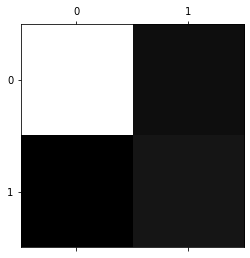

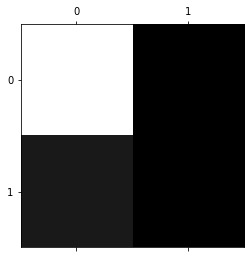

In [10]:
import matplotlib.pyplot as plt
plt.matshow(cm_sgd, cmap=plt.cm.gray)
plt.matshow(cm_dummy, cmap=plt.cm.gray)

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [11]:
#
#
#
#
#
#